# CHE 1148 Assignment 4
Name: Fendi Halim Tjoa

Student ID: 100753017

Instructor: Nikolaos Anesiadis

TA: Kavya Siddartha

Note: This notebook runs on google colab


## Predict error of DFT calculations <br> Publication by H. Bhatarjee, N. Anesiadis and D. Vlachos here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8277863/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Import the data - Extract X and y (y: the last column of the table)

In [ ]:
# 1 Upload data.xslx file
from google.colab import files
uploaded = files.upload() 

Saving data.xlsx to data.xlsx


In [ ]:
X_y = pd.read_excel('data.xlsx', index_col=None, header=None)

In [ ]:
X = X_y.drop([713], axis = 1)
y = X_y[713]
X.shape

(1676, 713)

## Using the whole data set

In [ ]:
x_colz = (X != 0).astype(int).sum(axis=0)/len(X)*100

In [ ]:
model_L2 = linear_model.Ridge(alpha=2)
model_L2.fit(X, y)

Ridge(alpha=2)

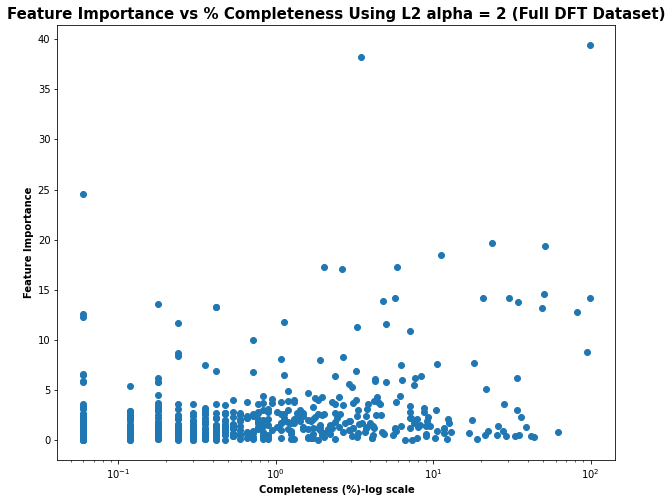

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_colz, np.abs(model_L2.coef_))
plt.title('Feature Importance vs % Completeness Using L2 alpha = 2 (Full DFT Dataset)',\
          fontsize = 15,fontdict=dict(weight='bold'))
plt.xlabel('Completeness (%)-log scale',fontsize = 10, fontdict=dict(weight='bold'))
plt.ylabel('Feature Importance',fontsize = 10, fontdict=dict(weight='bold'))
plt.xscale('log')
plt.show()

Q: If you want to improve this model what kind of features would you design or incorporate in your data?

A: The answer will be using features that has very high percent completeness. The reason is that most of the low percent completeness features mostly have lower feature importance. Moreover, the alternative is to impute the data more correctly instead of imputing 0 values.

In [ ]:
# np.argwhere(np.abs(model_L2.coef_) > 5)

## Using the train data set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
x_colz_train = (X_train != 0).astype(int).sum(axis=0)/len(X_train)*100
model_L2_train = linear_model.Ridge(alpha=2)
model_L2_train.fit(X_train, y_train)

Ridge(alpha=2)

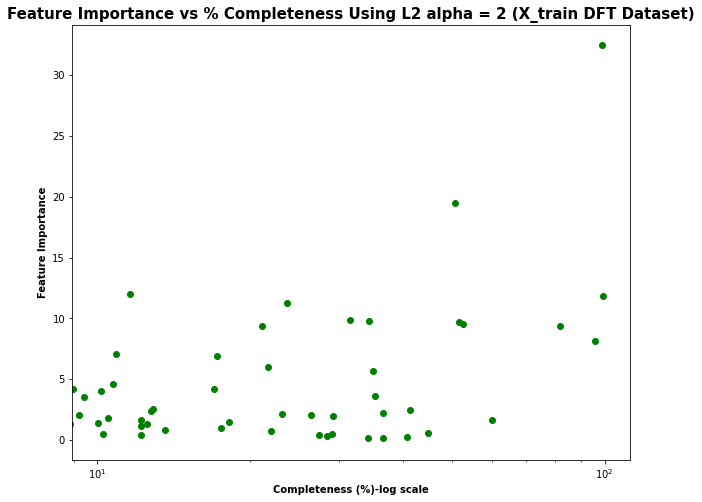

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_colz_train, np.abs(model_L2_train.coef_), color = 'green')
plt.title('Feature Importance vs % Completeness Using L2 alpha = 2 (X_train DFT Dataset)',\
          fontsize = 15,fontdict=dict(weight='bold'))
plt.xlabel('Completeness (%)-log scale',fontsize = 10, fontdict=dict(weight='bold'))
plt.ylabel('Feature Importance',fontsize = 10, fontdict=dict(weight='bold'))
plt.xscale('log')
plt.show()

Q: If you want to improve this model what kind of features would you design or incorporate in your data?

A: The answer will be the feature that has very high percent completeness. The reason is that most of the low percent completeness features mostly have lower feature importance. Moreover, the alternative is to impute the data more correctly instead of imputing 0 values.